# Convert BERT regressor into multiclassifier

code obtained from

https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("dataset.csv", sep=',')
df = data[['Summary', 'HoursActualRound']]
df

,Summary,HoursActualRound
0,Flag RI on SCM Message Summary screen using me...,2
1,Allow RI Policies to be marked as Exhausted,7
2,Fix Invalid UWREF Line DX402L99A1N,1
3,New rows in the diary event for the SCM are re...,1
4,Application Screen Size - Need to set Min Size...,4
...,...,...
12294,YYY ZZZ - Month-End Support,1
12295,Management Tasks - December 2014,19
12296,Reconfiguring Home Network For New Broadband,8
12297,Cancelling Silverbug Contract,1


There are 189 categories, or different amounts of time

In [ ]:
df['HoursActualRound'].value_counts().count()

189

In [ ]:
df.nunique()

Summary             9701
HoursActualRound     189
dtype: int64

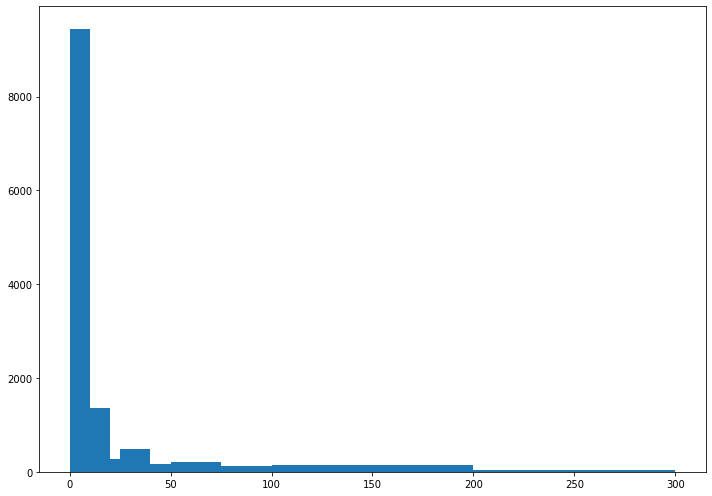

In [ ]:
from matplotlib import pyplot as plt

# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(df['HoursActualRound'], bins = [0,10,20, 25, 40, 50, 75, 100,200,300])
 
# Show plot
plt.show()

In [ ]:
dups = df.groupby(df.HoursActualRound.tolist()).size().reset_index().rename(columns={0:'count'})
dups

,index,count
0,0,729
1,1,2793
2,2,1663
3,3,1244
4,4,922
...,...,...
184,563,3
185,698,2
186,833,1
187,2005,3


Let's now create a dictionary with all our labels and their cons

In [ ]:
possible_labels = df.HoursActualRound.unique()
pos_lab_sort = possible_labels.sort()
print(possible_labels)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   93   94   95   96   97   98
   99  100  101  102  104  105  106  107  108  109  111  112  113  115
  118  119  120  122  123  126  127  128  129  130  135  136  138  140
  142  143  147  149  150  152  154  156  157  158  159  162  163  164
  165  166  167  169  171  175  176  177  187  190  193  197  201  204
  208  209  213  214  218  221  222  254  260  269  280  288  301  302
  303  317  328  334  340  343  367  387  408  431  443  456  474  476
  518  558  563  698  833 2005 2490]


In [ ]:
def cluster(df):
  arr=[]
  for i in range(len(df)):
    if df[i] >0 and df[i]<=5:
      group = 5
    elif df[i] >5 and df[i]<=10:
      group = 10
    elif df[i] >10 and df[i]<=15:
      group = 15
    elif df[i] >15 and df[i]<=20:
      group = 20
    elif df[i] >20 and df[i]<=25:
      group = 25
    elif df[i] >25 and df[i]<=30:
      group = 30
    elif df[i] >30 and df[i]<=60:
      group = 60
    elif df[i] >60 and df[i]<=90:
      group = 90
    elif df[i] >90 and df[i]<=3000:
      group = 100

    arr.append(group)

  return(arr)

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
#label_dict

In [ ]:
df2 = pd.DataFrame(cluster(df["HoursActualRound"]))
df2.columns = ['groupedLabels']

In [ ]:
df3 = pd.concat([df["HoursActualRound"],df2], axis=1)
df3

,HoursActualRound,groupedLabels
0,2,5
1,7,10
2,1,5
3,1,5
4,4,5
...,...,...
12294,1,5
12295,19,20
12296,8,10
12297,1,5


In [ ]:
df['label'] = df.HoursActualRound.replace(label_dict)

<ipython-input-11-e7aeb00ec30a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.HoursActualRound.replace(label_dict)


In [ ]:
df['label'].unique()

array([  2,   7,   1,   4,  14,  18,   0,  70,  12, 103,  28,   5,  21,
         3,  42,  11,  35,   6,   8,   9,  97,  49,  19,  15,  23,  29,
        25,  22,  47,  51,  10,  24,  26,  16,  27,  33,  41,  53,  78,
        56, 126,  13,  40,  31,  32,  63,  38,  20,  61,  43,  36,  64,
        84,  17,  68,  46,  71,  80,  30,  50,  52, 172, 169, 111,  90,
        34,  44, 133,  39,  48,  59, 117, 150, 112, 109,  37,  93,  54,
        45, 100,  74,  86,  82,  75, 122, 142, 168, 177,  95,  72, 135,
       107, 106,  98,  76, 137,  96, 123, 162,  58,  62, 164, 101,  69,
        81, 145,  60, 148, 161, 165,  92,  65, 186,  79,  55,  89, 159,
        88, 108, 140,  73,  85,  99, 184,  77, 124, 173, 160, 125, 128,
       181, 143,  66, 120, 119, 151, 131, 146, 154, 188, 118, 104, 121,
       114, 136, 152,  83, 183, 102, 139, 141, 134, 105, 130, 167, 144,
       127,  94, 187, 180, 149,  87, 185,  67, 115, 155, 110, 175, 158,
       138, 182, 129, 176,  91, 166, 153, 170,  57, 174, 178, 15

In [ ]:
df2["groupedLabels"].unique()

array([  5,  10,  15,  20,  90, 100,  30,  25,  60])

In [ ]:
dups2 = df2.groupby(df2.groupedLabels.tolist()).size().reset_index().rename(columns={0:'count'})
dups2


,index,count
0,5,7712
1,10,1795
2,15,909
3,20,389
4,25,284
5,30,215
6,60,521
7,90,191
8,100,283


In [ ]:
possible_labels = df2.groupedLabels.unique()
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{5: 0, 10: 1, 15: 2, 20: 3, 90: 4, 100: 5, 30: 6, 25: 7, 60: 8}

In [ ]:
df['label'] = df2.groupedLabels.replace(label_dict)
df['label']

<ipython-input-16-2cb07ed1d4a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df2.groupedLabels.replace(label_dict)


0        0
1        1
2        0
3        0
4        0
        ..
12294    0
12295    3
12296    1
12297    0
12298    0
Name: label, Length: 12299, dtype: int64

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.1 MB/s 
     |████████████████████████████████| 7.6 MB 29.7 MB/s 
     |████████████████████████████████| 182 kB 103.1 MB/s 


In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

Let's split our values 85-15

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.Summary,
                                                  df.label,
                                                  test_size=0.15, 
                                                  random_state=42)

Now let's see how many words each user story has

In [ ]:
word_count = df['Summary'].apply(lambda x: len(x.split()))

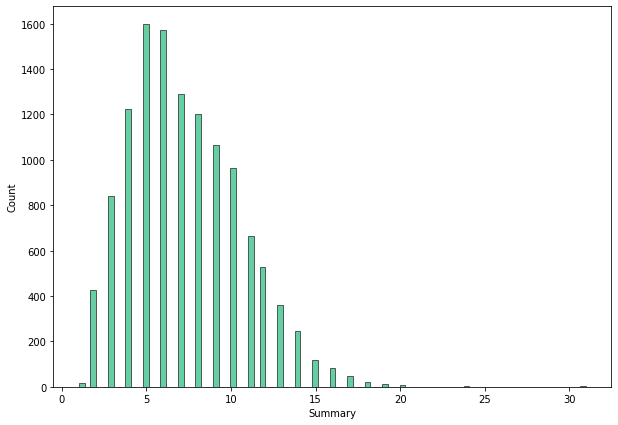

In [ ]:
fig = plt.figure(figsize=[10,7])
sns.histplot(word_count, color=sns.xkcd_rgb['greenish teal'])
plt.show()

In [ ]:
wc_test = df['Summary'].apply(lambda x: len(x.split()))
wc_test

0        12
1         8
2         5
3        12
4        12
         ..
12294     5
12295     5
12296     6
12297     3
12298     4
Name: Summary, Length: 12299, dtype: int64

The longest User Story has 31 words

In [ ]:
word_count.max()

31

### Tokenize 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_train.values, 
    add_special_tokens=True, 
    truncation=True,
    return_attention_mask=True, 
    padding='longest', 
    
    max_length=31, 
    return_tensors='pt'
)

This code does two things, first it divides the sentence into words (tokens) and it also embedds each word converting it into a numerical value

In [ ]:
encoded_data_train

{'input_ids': tensor([[  101,  5815, 11703,  ...,     0,     0,     0],
        [  101,  8556, 11089,  ...,     0,     0,     0],
        [  101,  4638,  6904,  ...,     0,     0,     0],
        ...,
        [  101, 22038, 20348,  ...,     0,     0,     0],
        [  101,  5587,  3796,  ...,     0,     0,     0],
        [  101,  5821,  3116,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
encoded_data_val = tokenizer.batch_encode_plus(
    X_val.values, 
    add_special_tokens=True, 
    truncation=True,
    return_attention_mask=True, 
    padding='longest', 
    max_length=31, 
    return_tensors='pt'
)

Here we have the input ids which is our embedded vector of max 31 with padding, the attention mask and the labels

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

In [ ]:
attention_masks_train

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

### Let's download the pretrained BERT Model

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=9,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

model.to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/finetuned_BERT_epoch_40_BS1_LR-5.model', map_location=torch.device('cuda')))

cuda


<All keys matched successfully>

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 1

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 40

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
import numpy as np
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
 

In [ ]:
   
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
    if epoch%10 == 0:
      torch.save(model.state_dict(), f'/content/drive/MyDrive/finetuned_BERT_epoch_{epoch+40}_BS1_LR-5.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.12988095937729763
Validation loss: 3.24477872986563
F1 Score (Weighted): 0.6968339857954677


Epoch 2:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.1310417348205059
Validation loss: 3.1058384647685764
F1 Score (Weighted): 0.7027237302228364


Epoch 3:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.134207078117497
Validation loss: 3.0710012955565076
F1 Score (Weighted): 0.7040511379255115


Epoch 4:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.12241005871722155
Validation loss: 3.524403162242295
F1 Score (Weighted): 0.6724895380743086


Epoch 5:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.13350643397481465
Validation loss: 3.048626129549815
F1 Score (Weighted): 0.7209694595377837


Epoch 6:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.1350045611178172
Validation loss: 3.2221109490032442
F1 Score (Weighted): 0.7010464076542111


Epoch 7:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.13212611996334891
Validation loss: 3.1476300335613274
F1 Score (Weighted): 0.6997194924473138


Epoch 8:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.13380400750577895
Validation loss: 3.2440406379667808
F1 Score (Weighted): 0.69097104973091


Epoch 9:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.12985922036757516
Validation loss: 3.0630051657313797
F1 Score (Weighted): 0.7100014046060604


Epoch 10:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.13348127868833504
Validation loss: 3.054182710326396
F1 Score (Weighted): 0.7020574881728471


Epoch 11:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.11389990217952771
Validation loss: 3.0900028678655636
F1 Score (Weighted): 0.6828155291100099


Epoch 12:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.12127126957232635
Validation loss: 2.9804132047944116
F1 Score (Weighted): 0.7068121908952982


Epoch 13:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.11666158016196963
Validation loss: 3.383284157990933
F1 Score (Weighted): 0.6843721168596579


Epoch 14:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.10596016788954042
Validation loss: 3.219720987474423
F1 Score (Weighted): 0.6998886840156701


Epoch 15:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.10635997331533623
Validation loss: 3.0633077258069457
F1 Score (Weighted): 0.7037584920079404


Epoch 16:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.10522150387402447
Validation loss: 3.3266433713037413
F1 Score (Weighted): 0.6909940099028093


Epoch 17:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.0974800455709247
Validation loss: 3.293444381385628
F1 Score (Weighted): 0.6979306022884119


Epoch 18:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.10326240588380338
Validation loss: 3.4681496630430755
F1 Score (Weighted): 0.6794492817185003


Epoch 19:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.11322343048497248
Validation loss: 3.1997510185035702
F1 Score (Weighted): 0.698772208301683


Epoch 20:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 20
Training loss: 0.1001631958533977
Validation loss: 3.087626439307037
F1 Score (Weighted): 0.7140207069697092


Epoch 21:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 21
Training loss: 0.09564259284157196
Validation loss: 3.5122877659508487
F1 Score (Weighted): 0.6796886835103665


Epoch 22:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 22
Training loss: 0.09251652629075409
Validation loss: 3.2068844710219677
F1 Score (Weighted): 0.6996407921738439


Epoch 23:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 23
Training loss: 0.08732333777296254
Validation loss: 3.357190660751458
F1 Score (Weighted): 0.6909985994379713


Epoch 24:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 24
Training loss: 0.09847561815491432
Validation loss: 3.2808478637789715
F1 Score (Weighted): 0.68932867278284


Epoch 25:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 25
Training loss: 0.09632590272256158
Validation loss: 3.2390827691862105
F1 Score (Weighted): 0.6993255798861291


Epoch 26:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 26
Training loss: 0.08229335911333219
Validation loss: 3.189979112847009
F1 Score (Weighted): 0.7084650683662163


Epoch 27:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 27
Training loss: 0.08580919900998463
Validation loss: 3.5293111553591117
F1 Score (Weighted): 0.6806534920548926


Epoch 28:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 28
Training loss: 0.08783870201332829
Validation loss: 3.2755293976858937
F1 Score (Weighted): 0.704287005960986


Epoch 29:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 29
Training loss: 0.0954897790356257
Validation loss: 3.163535400064522
F1 Score (Weighted): 0.7089529916885988


Epoch 30:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 30
Training loss: 0.08460889176608255
Validation loss: 3.160452210601155
F1 Score (Weighted): 0.7092567989486466


Epoch 31:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 31
Training loss: 0.08235117971389005
Validation loss: 3.2787657537436914
F1 Score (Weighted): 0.7042512364466388


Epoch 32:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 32
Training loss: 0.08671134032236619
Validation loss: 3.142444579039029
F1 Score (Weighted): 0.7139673527134125


Epoch 33:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 33
Training loss: 0.08045187808163672
Validation loss: 3.5245013878743623
F1 Score (Weighted): 0.6901450190006632


Epoch 34:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 34
Training loss: 0.08285335961816179
Validation loss: 3.3749222739864235
F1 Score (Weighted): 0.7012261792201278


Epoch 35:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 35
Training loss: 0.08632818908446978
Validation loss: 3.368288940722191
F1 Score (Weighted): 0.7023500410122542


Epoch 36:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 36
Training loss: 0.08054837867640076
Validation loss: 3.1415464086464717
F1 Score (Weighted): 0.7118487385394726


Epoch 37:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 37
Training loss: 0.07823997313784495
Validation loss: 3.3009867324667113
F1 Score (Weighted): 0.7007608688708645


Epoch 38:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 38
Training loss: 0.07921091578243834
Validation loss: 3.3448048176577836
F1 Score (Weighted): 0.7054947253041564


Epoch 39:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 39
Training loss: 0.07968626988732255
Validation loss: 3.1869240259173637
F1 Score (Weighted): 0.7129224752412097


Epoch 40:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 40
Training loss: 0.08092837293732022
Validation loss: 3.299101249562464
F1 Score (Weighted): 0.7067436747374581


Epoch 41:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 41
Training loss: 0.0860085966140027
Validation loss: 3.3940980001624257
F1 Score (Weighted): 0.6981843664997657


Epoch 42:   0%|          | 0/10454 [00:00<?, ?it/s]


Epoch 42
Training loss: 0.08041284420025747
Validation loss: 3.3914759962142518
F1 Score (Weighted): 0.7012081917169939


Epoch 43:   0%|          | 0/10454 [00:00<?, ?it/s]

## Let's not validate the performance of our. fine tuned model

In [ ]:
#Download base pre-trained model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=9,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

#Set the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cuda')
model.to(device)

print(device)

model.to(device)
#Download the finetuned model
model.load_state_dict(torch.load('/content/drive/MyDrive/finetuned_BERT_epoch_80_BS1_LR-5.model', map_location=torch.device('cuda')))

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

cuda


<All keys matched successfully>

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Class: 5
Accuracy: 966/1153

Class: 10
Accuracy: 127/279

Class: 15
Accuracy: 77/144

Class: 20
Accuracy: 30/58

Class: 90
Accuracy: 18/25

Class: 100
Accuracy: 22/39

Class: 30
Accuracy: 16/37

Class: 25
Accuracy: 13/35

Class: 60
Accuracy: 36/75



## Finally let's compare the performance of the fine-tuned model with the base model

In [ ]:
#Download base pre-trained model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=9,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

#Set the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cuda')
model.to(device)

print(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

cuda


In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Class: 5
Accuracy: 0/1153

Class: 10
Accuracy: 0/279

Class: 15
Accuracy: 0/144

Class: 20
Accuracy: 0/58

Class: 90
Accuracy: 9/25

Class: 100
Accuracy: 0/39

Class: 30
Accuracy: 0/37

Class: 25
Accuracy: 1/35

Class: 60
Accuracy: 23/75

